<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Importamos el Dataframe:

In [ ]:
# Cargar el dataset
df = sns.load_dataset('penguins')

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Primera aproximación a los datos de forma general y su limpieza:




1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?


#**1a**
Hay tres especies como se verá a continuación

In [ ]:
df.species.unique()
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# **1b**

Los pinguinos se caracterizan por la ubicación, longitud del pico, longitud de las aletas, masa comporal y género:

In [ ]:
df.columns[1:]

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.


#**2a**
Veamos si hay valores faltes con símbolo *nan*:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#**2b**
Limpieza:

In [ ]:
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?



#**3a**
La Isla con mayor número de pingüinos en el dataset es **Biscoe**:

In [ ]:
df.groupby("island").count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


# **3b**
El desbalance es notorio cuando coompramos a Torgersen con las demás, ya que duplican en número.

4. Repita la pregunta anterior observando las especies.

#**4a**
La especie con mayor número de pingünos es **Adelie**:

In [ ]:
df.groupby("species").count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


#**4b**
El desbalance es notable cuando comparamos a Chinstrap con las demás.

## Tendencias y visualizacion de las variables



5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?


$-->$\
Agrupando por species, donde a cada una se le calcula la media y desviación estánsar en base al tamaño del pico, obtenemos que Chinstrap es la especie con el pico más grande y también la que más variedad de picos contiene:

In [ ]:
df.groupby("species")["bill_length_mm"].agg(["mean", "std"])

,mean,std
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?


Pingüino con el pico más largo:

In [ ]:
df[df["bill_length_mm"] == df["bill_length_mm"].max()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?


Dataframe para cada especie:

In [ ]:
Adelie = df[df["species"] == "Adelie"]
Gentoo = df[df["species"] == "Gentoo"]
Chinstrap = df[df["species"] == "Chinstrap"]

Histograma:

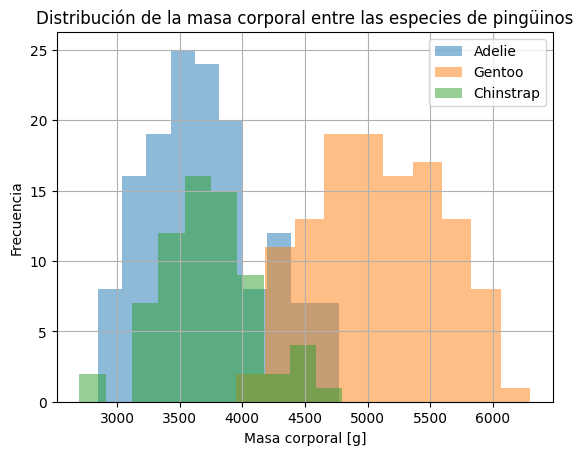

In [ ]:
plt.hist(Adelie["body_mass_g"], bins=10, alpha=0.5, label="Adelie")
plt.hist(Gentoo["body_mass_g"], bins=10, alpha=0.5, label="Gentoo")
plt.hist(Chinstrap["body_mass_g"], bins=10, alpha=0.5, label="Chinstrap")
plt.legend(loc="upper right")
plt.title("Distribución de la masa corporal entre las especies de pingüinos")
plt.xlabel("Masa corporal [g]")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()


8. Describa la distribucion con ayuda de la media, desviacion estandard


La especie Adelie a ser la pesada y Gentoo la que más variedad de masa contiene, lo cual coincide con los gráficos del numeral anterior:

In [ ]:
df.groupby(["species"])["body_mass_g"].agg(["mean", "std"])

,mean,std
species,,
Adelie,3706.164384,458.620135
Chinstrap,3733.088235,384.335081
Gentoo,5092.436975,501.476154


9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?



Medias y desciaviones de ambos géneros teniendo en cuenta todas las islas y species:

In [ ]:
SEX = df.groupby(["sex"])["body_mass_g"].agg(["mean", "std"])
SEX

,mean,std
sex,,
Female,3862.272727,666.172050
Male,4545.684524,787.628884


Diferencia entre ambos géneros:

In [ ]:
D1 = abs(SEX["mean"]["Female"] - SEX["mean"]["Male"])
D2 = abs(SEX["std"]["Female"] - SEX["std"]["Male"])

pd.DataFrame([[D1, D2]], columns=['mean', 'std'],
                            index=['Diferencia'])


,mean,std
Diferencia,683.411797,121.456835


Los machos son más pesados y más variados. En masa pueden superar a las hembras en **683 gramos** más.

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
]

La especie Gentoo tiene las aletas de mayor longitud y Chinstrap es la de mayor variedad:

In [ ]:
df.groupby("species")["flipper_length_mm"].agg(["mean", "std"])

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?



Las longitudes máximas y mínimas están en el siguiente Dataframe:

In [ ]:
df.groupby("species")["flipper_length_mm"].agg(["max", "min"])

,max,min
species,,
Adelie,210.0,172.0
Chinstrap,212.0,178.0
Gentoo,231.0,203.0


12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?



Vamos a mostrar qué especies están en determinadas islas:

In [ ]:
df.groupby(["island", "species"])["bill_length_mm"].agg(["mean", "std"])

mean       std
island    species                       
Biscoe    Adelie     38.975000  2.480916
          Gentoo     47.568067  3.106116
Dream     Adelie     38.520000  2.484276
          Chinstrap  48.833824  3.339256
Torgersen Adelie     39.038298  3.028097

La tabla anterior nos da a entender que en la isla Biscoe están las especies Adelie y Gentoo. En la isla Dream están Adelie y Chinstrap. En Torgersen sólo está Adelie. Con lo anterior creamos los siguientes Dataframe y creamos histograma:

In [ ]:
# Islas
Torgersen = df[df["island"] == "Torgersen"]
Dream = df[df["island"] == "Dream"]
Biscoe = df[df["island"] == "Biscoe"]

# Especies dentro de cada lsla
B_Adelie = Biscoe[Biscoe["species"] == "Adelie"]
B_Gentoo = Biscoe[Biscoe["species"] == "Gentoo"]

D_Adelie = Dream[Dream["species"] == "Adelie"]
D_Chinstrap = Dream[Dream["species"] == "Chinstrap"]

T_Adelie = Torgersen[Torgersen["species"] == "Adelie"]

Histograma:

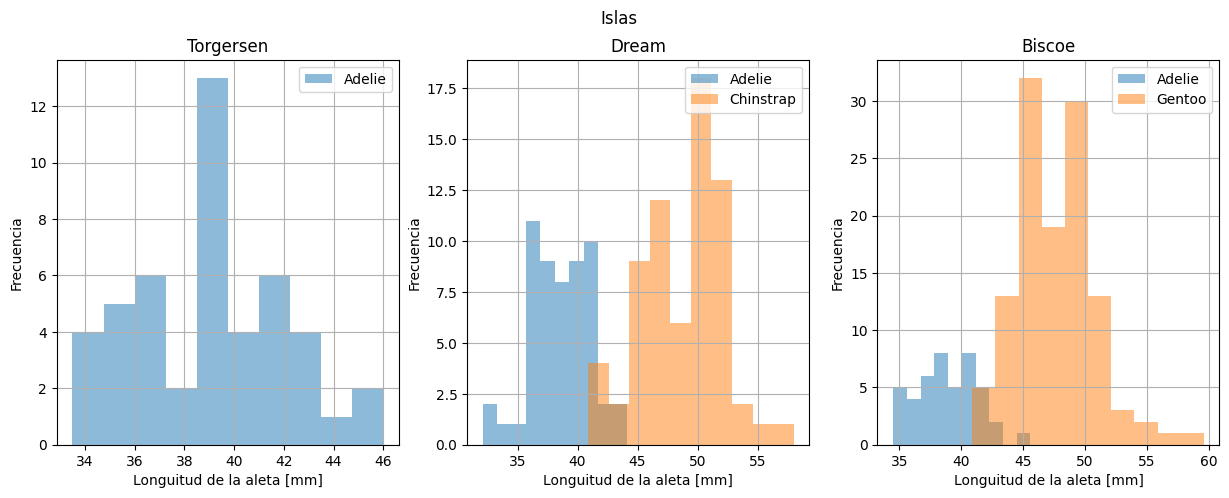

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Islas")
axs[0].hist(T_Adelie["bill_length_mm"], bins=10, alpha=0.5, label="Adelie")
axs[0].legend(loc="upper right")
axs[0].set_title("Torgersen")
axs[0].set_xlabel("Longuitud de la aleta [mm]")
axs[0].set_ylabel("Frecuencia")
axs[0].grid()

axs[1].hist(D_Adelie["bill_length_mm"], bins=10, alpha=0.5, label="Adelie")
axs[1].hist(D_Chinstrap["bill_length_mm"], bins=10, alpha=0.5, label="Chinstrap")
axs[1].legend(loc="upper right")
axs[1].set_title("Dream")
axs[1].set_xlabel("Longuitud de la aleta [mm]")
axs[1].set_ylabel("Frecuencia")
axs[1].grid()

axs[2].hist(B_Adelie["bill_length_mm"], bins=10, alpha=0.5, label="Adelie")
axs[2].hist(B_Gentoo["bill_length_mm"], bins=10, alpha=0.5, label="Gentoo")
axs[2].legend(loc="upper right")
axs[2].set_title("Biscoe")
axs[2].set_xlabel("Longuitud de la aleta [mm]")
axs[2].set_ylabel("Frecuencia")
axs[2].grid()


13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?




La isla con mayor variación de longitud del pico es **Dream** (también se puede ver en el numeral anterior):

In [ ]:
df.groupby(["island"])["bill_length_mm"].std()

,bill_length_mm
island,
Biscoe,4.827319
Dream,5.947069
Torgersen,3.028097


## Relación entre caracteristicas de los pingüinos



14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.



#**14a**
Relación pico y masa coorporal juntando todas las especies:

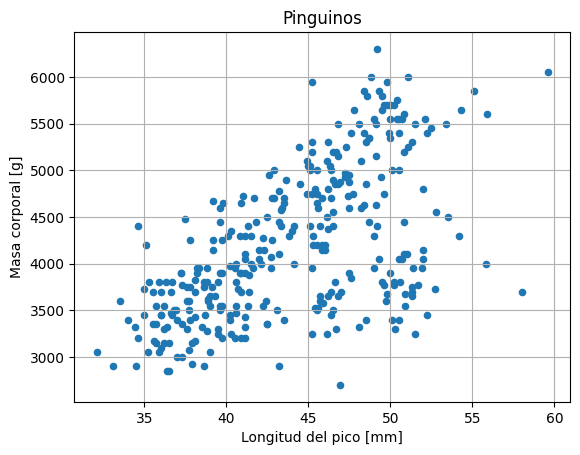

In [ ]:
df.plot.scatter(x="bill_length_mm", y="body_mass_g")
plt.title("Pinguinos")
plt.xlabel("Longitud del pico [mm]")
plt.ylabel("Masa corporal [g]")
plt.grid()

El gráfico muestra una relación proporcional entre la longitud del pico y la masa corporal.

#**14b**
Haciendo lo mismo para cada especie, se encontró que la relación sigue siendo proporcional:


In [ ]:
# Dataframe separados por especies:
Adelie = df[df["species"] == "Adelie"]
Gentoo = df[df["species"] == "Gentoo"]
Chinstrap = df[df["species"] == "Chinstrap"]

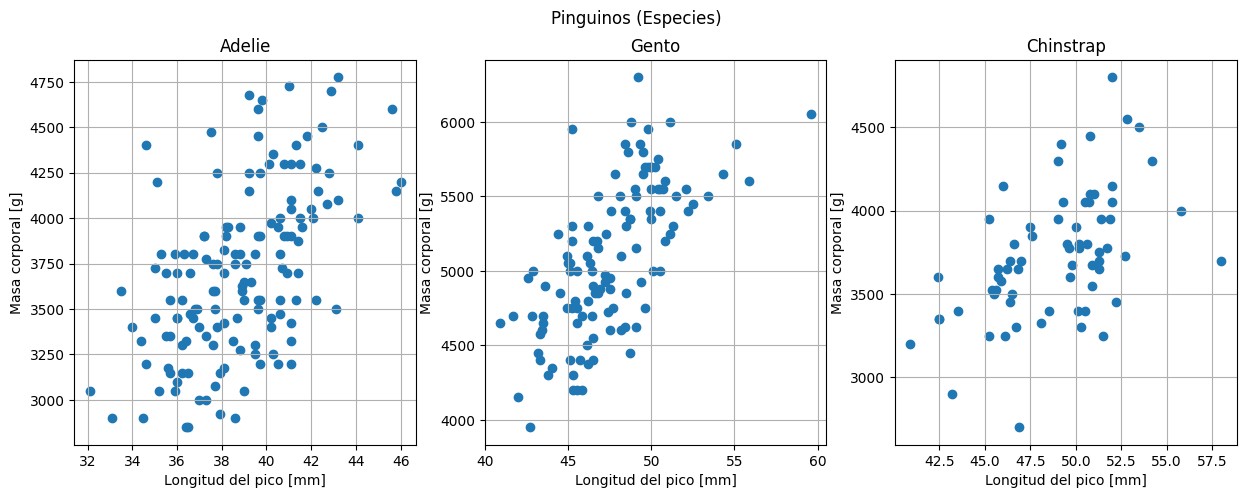

In [ ]:
# Gráfico
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Pinguinos (Especies)")

axs[0].scatter(Adelie["bill_length_mm"], Adelie["body_mass_g"])
axs[0].set_title("Adelie")
axs[0].set_xlabel("Longitud del pico [mm]")
axs[0].set_ylabel("Masa corporal [g]")
axs[0].grid()

axs[1].scatter(Gentoo["bill_length_mm"], Gentoo["body_mass_g"])
axs[1].set_title("Gento")
axs[1].set_xlabel("Longitud del pico [mm]")
axs[1].set_ylabel("Masa corporal [g]")
axs[1].grid()

axs[2].scatter(Chinstrap["bill_length_mm"], Chinstrap["body_mass_g"])
axs[2].set_title("Chinstrap")
axs[2].set_xlabel("Longitud del pico [mm]")
axs[2].set_ylabel("Masa corporal [g]")
axs[2].grid()

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?



Teniendo en cuenta que las correlaciones con positivas, nos da a entender que hay una relación creciente entre las dos variables tratadas. Por el hecho de ser mayor a **0.5**, nos dice que hay una relación lineal:

In [ ]:
# Correlación
df.groupby(["species"])["bill_length_mm"].corr(df["body_mass_g"])

,bill_length_mm
species,
Adelie,0.544276
Chinstrap,0.513638
Gentoo,0.666730


16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?





- En todas las especies los machos tienen las aletas más largas que las hembras.
- Una hembra de la especie Gentoo tiene la aleta más grande que un macho de la especie de Chinstrap y/o Adelie.
- Los machos de la especie de Adelie tienen más variedas de longitudes a comparación del resto.


In [ ]:
df.groupby(["species", "sex"])["flipper_length_mm"].agg(['mean', 'std'])

mean       std
species   sex                         
Adelie    Female  187.794521  5.595035
          Male    192.410959  6.599317
Chinstrap Female  191.735294  5.754096
          Male    199.911765  5.976558
Gentoo    Female  212.706897  3.897856
          Male    221.540984  5.673252

Agrupamos Dataframe por géneros pR graficar:

In [ ]:
# Especies
Adelie = df[df["species"] == "Adelie"]
Gentoo = df[df["species"] == "Gentoo"]
Chinstrap = df[df["species"] == "Chinstrap"]

# Agrupación por género
Adelie_M = Adelie[Adelie["sex"] == "Male"]
Adelie_F = Adelie[Adelie["sex"] == "Female"]

Gentoo_M = Gentoo[Gentoo["sex"] == "Male"]
Gentoo_F = Gentoo[Gentoo["sex"] == "Female"]

Chinstrap_M = Chinstrap[Chinstrap["sex"] == "Male"]
Chinstrap_F = Chinstrap[Chinstrap["sex"] == "Female"]


Histograma:

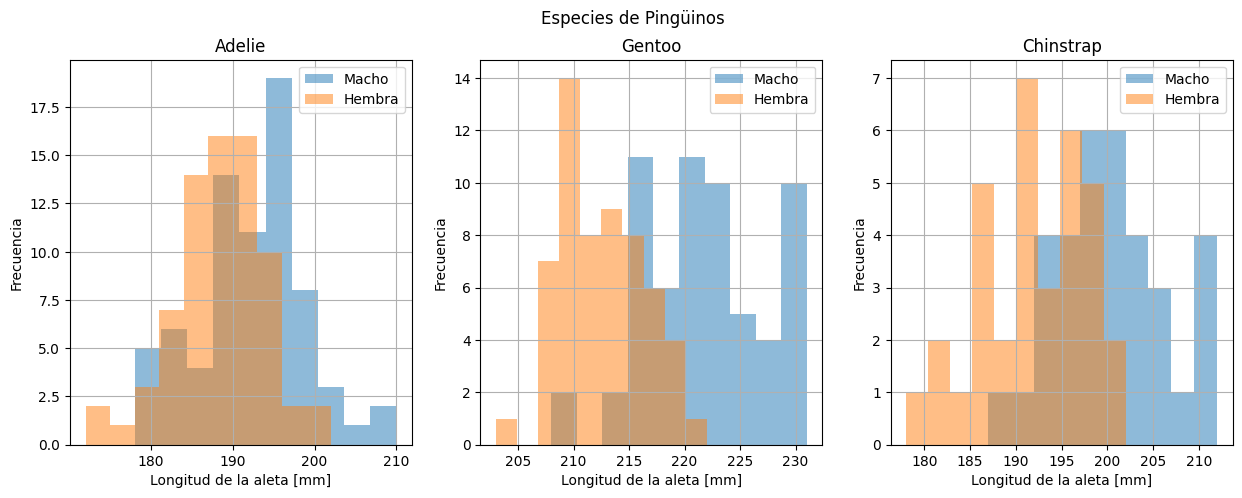

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Especies de Pingüinos")
axs[0].hist(Adelie_M["flipper_length_mm"], bins=10, alpha=0.5, label="Macho")
axs[0].hist(Adelie_F["flipper_length_mm"], bins=10, alpha=0.5, label="Hembra")
axs[0].legend(loc="upper right")
axs[0].set_title("Adelie")
axs[0].set_xlabel("Longitud de la aleta [mm]")
axs[0].set_ylabel("Frecuencia")
axs[0].grid()

axs[1].hist(Gentoo_M["flipper_length_mm"], bins=10, alpha=0.5, label="Macho")
axs[1].hist(Gentoo_F["flipper_length_mm"], bins=10, alpha=0.5, label="Hembra")
axs[1].legend(loc="upper right")
axs[1].set_title("Gentoo")
axs[1].set_xlabel("Longitud de la aleta [mm]")
axs[1].set_ylabel("Frecuencia")
axs[1].grid()

axs[2].hist(Chinstrap_M["flipper_length_mm"], bins=10, alpha=0.5, label="Macho")
axs[2].hist(Chinstrap_F["flipper_length_mm"], bins=10, alpha=0.5, label="Hembra")
axs[2].legend(loc="upper right")
axs[2].set_title("Chinstrap")
axs[2].set_xlabel("Longitud de la aleta [mm]")
axs[2].set_ylabel("Frecuencia")
axs[2].grid()

## Test de hipótesis



17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

**Hipotesis nula**: No hay correlación entre la masa corporal y longitud del pico $(\rho = 0)$.

**Hipotesis alternativa**:Hay correlación entre la masa corporal y longitud del pico $(\rho \neq 0)$

In [ ]:
#Estimador de la correlacion de Pearson
def pearson_correlation(X, Y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos listas o arrays de datos X e Y.

    Parámetros:
    X -- Lista o array de valores de la variable X.
    Y -- Lista o array de valores de la variable Y.

    Retorna:
    r -- Coeficiente de correlación de Pearson.
    """
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    sum_XY = np.sum(X * Y)
    numerador = sum_XY - n * mean_X * mean_Y

    # Desviaciones estándar muestrales (n-1 en el denominador)
    std_X = np.std(X, ddof=1)  # ddof=1 para obtener S_x
    std_Y = np.std(Y, ddof=1)  # ddof=1 para obtener S_y

    denominador = (n - 1) * std_X * std_Y
    r = numerador / denominador
    return r

Variables a correlacionar:

In [120]:
X = df["body_mass_g"]
Y = df["bill_length_mm"]
n = len(df["body_mass_g"])

Diccionario:

In [127]:
dict = {'X': X, 'Y': Y}
df = pd.DataFrame(dict)
n = len(df['X'])
print(df)

          X     Y
0    3750.0  39.1
1    3800.0  39.5
2    3250.0  40.3
3    3450.0  36.7
4    3650.0  39.3
..      ...   ...
328  4925.0  47.2
329  4850.0  46.8
330  5750.0  50.4
331  5200.0  45.2
332  5400.0  49.9

[333 rows x 2 columns]


In [128]:
X = np.array(X)
Y = np.array(Y)
xus=(X-np.mean(X))/np.std(X)
yus=(Y-np.mean(Y))/np.std(Y)

In [129]:
(X.std()*Y.std()).mean()

np.float64(4390.234566991338)

In [130]:
(yus*xus).mean()

np.float64(0.5894511101769488)

In [131]:
#Determinacion del coeficiente de correlacion
r = pearson_correlation(df["X"], df["Y"])
print(f'El coeficiente de correlación lineal es: {round(r, 3)}')

El coeficiente de correlación lineal es: 0.589


In [135]:
t = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))
intervalo = stats.t.interval(0.95, n-2, loc=0, scale=1)
print(f'El estimador es: {round(t, 3)}')
print(f'El intervalo es: [ {round(intervalo[0], 4)} , {round(intervalo[1], 4)}]')

El estimador es: 13.276
El intervalo es: [ -1.9672 , 1.9672]


El estimador está fuera del intervalo y la hipotesis nula de no correlacion se rechaza.